In [11]:
!git clone https://github.com/pralab/Fast-Minimum-Norm-FMN-Attack.git

# run cp -r Fast-Minimum-Norm-FMN-Attack fmn

fatal: destination path 'Fast-Minimum-Norm-FMN-Attack' already exists and is not an empty directory.


In [23]:
%pip install git+https://github.com/RobustBench/robustbench.git
# %pip install torchvision
# !pip install typing --upgrade
# %pip install robustbench
%pip install -r fmn/requirements.txt
%pip install torch
%pip install matplotlib # add matplotlb to 

  Cloning https://github.com/RobustBench/robustbench.git to /tmp/pip-req-build-rwx6m6id
  Running command git clone --filter=blob:none --quiet https://github.com/RobustBench/robustbench.git /tmp/pip-req-build-rwx6m6id
  Resolved https://github.com/RobustBench/robustbench.git to commit baf658b9b45711bb85919088fe185d3bc69f80a9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fra31/auto-attack.git (to revision 6482e4d6fbeeb51ae9585c41b16d50d14576aadc) to /tmp/pip-install-4jz1ub1l/autoattack_123461bdad8644359415cfc15446c4fe
  Running command git clone --filter=blob:none --quiet https://github.com/fra31/auto-attack.git /tmp/pip-install-4jz1ub1l/autoattack_123461bdad8644359415cfc15446c4fe
  Running command git rev-parse -q --verify 'sha^6482e4d6fbeeb51ae9585c41b16d50d14576aadc'
  Running command git fetch -q https://github.com/fra31/auto-attack.git 6482e4d6fbeeb51ae9585c41b16d50d14576aadc
  Running command git checkout -q 6482e4d6fbeeb51ae9585c41b16d50d14576aadc
  Resolv

In [3]:

from robustbench.utils import load_model
# Load a model from the model zoo
model = load_model(model_name='Standard', dataset='cifar10', threat_model='Linf')


# # Evaluate the Linf robustness of the model using AutoAttack
# from robustbench.eval import benchmark
# clean_acc, robust_acc = benchmark(model,
#                                   dataset='cifar10',
#                                   threat_model='Linf')


In [24]:
from fmn.src.attacks.fmn import L1FMNAttack
import foolbox as fb
import torch
import torchvision.datasets as datasets
from foolbox import Misclassification
from fmn.src.utils.data import create_loaders
from fmn.src.utils.show_digit import show_image



In [15]:
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'

cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=None)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=None)


num_batches = 1
batch_size = 20
n_workers = 1
data_loader = create_loaders("./data", task_config="CIFAR10",
                             batch_size=batch_size,
                             transform=None,
                             random_state=0,
                             n_workers=n_workers)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [18]:

images, labels = next(iter(data_loader))
images, labels = images.to(device), labels.to(device)

model = model
fmodel = fb.PyTorchModel(model, bounds=(0, 1))
attack = L1FMNAttack()
advs, _, is_adv = attack(fmodel, images, Misclassification(labels), epsilons=None)

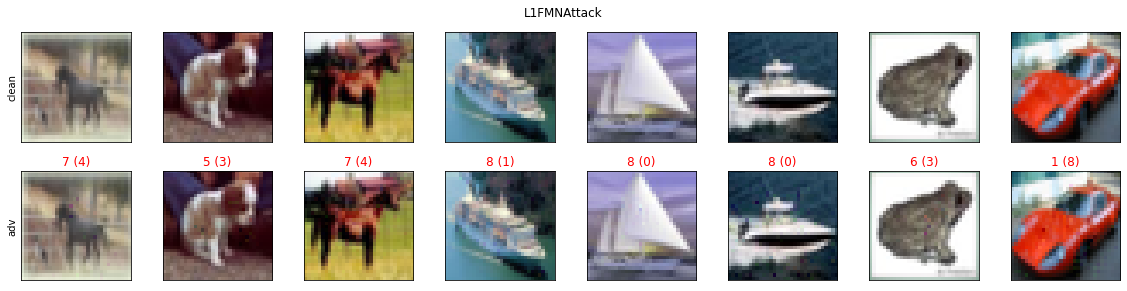

In [26]:
diffs = advs - images
preds = fmodel(advs).argmax(-1)
title = attack.__class__.__name__
show_image(title, images, advs, preds, labels, n_display=8,
               img_shape=images[0].shape)